In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [25]:
print('Preparing the database')
# featuresDf = pd.read_pickle('./dataset/featuresDF.pkl')
featuresDf = pd.read_pickle('./dataset/featuresDF_1_LN.pkl')
featuresDf['fourier_mfcc'] = [np.concatenate([featuresDf.fourier[i],
                              featuresDf.mfcc[i]]) for i in range(len(featuresDf))]
# featuresDf.drop(columns=['sound', 'fourier', 'mfcc'], inplace=True)
df_t, df_val = train_test_split(featuresDf, test_size=0.2) # random_state=42
X = np.array(df_t['fourier_mfcc'].tolist())
y = np.array(df_t['class'].tolist())
val_x = np.array(df_val['fourier_mfcc'].tolist())
val_y = np.array(df_val['class'].tolist())
lb = LabelEncoder()
y = np_utils.to_categorical(lb.fit_transform(y))
val_y = np_utils.to_categorical(lb.fit_transform(val_y))
print(X.shape) # (9352, 384)
print(y.shape) # (9352, 4)

Preparing the database
(8850, 384)
(8850, 4)


In [28]:
384/12

32.0

In [ ]:
# The dataset is around 100,000 samples with 32 features and label dataset is the
# same length with 6 label classes (100000, 6)

# If you want to use Conv1D you just need to add a channel dimension with size 1, 
# that is X_train.reshape(-1, X.shape[1], 1).

# If you wish to use Conv2D you may reshape it as X_train.reshape(-1, 8, 4, 1) 
# or in any similar way so that the product of the second and the third dimension
# would be equal to the number of features.

In [29]:
X = X.reshape(-1, 12, 32, 1)
val_x = val_x.reshape(-1, 12, 32, 1)

In [30]:
print(X.shape)
print(val_x.shape)

(8850, 12, 32, 1)
(2213, 12, 32, 1)


In [31]:
input_shape = (12, 32, 1)

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation

In [56]:
print('Building the Neural Network')

# Build the model:
filepath='./models/cnn_checkpoint_{epoch:02d}_{val_loss:.2f}.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True) # mode='max'
# earlystopper = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
# callbacks_list=[checkpointer, earlystopper]
callbacks_list=[checkpointer]

num_labels = y.shape[1]
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(num_filters, filter_size, input_shape=input_shape,
                 strides=2, padding='same', activation='relu'))
model.add(Conv2D(num_filters, filter_size))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model:
print('Training the Neural Network')
history = model.fit(X, y, batch_size=500, epochs=2500, validation_data=(val_x, val_y), callbacks=callbacks_list)
print('Done')

Building the Neural Network
Training the Neural Network
Train on 8850 samples, validate on 2213 samples
Epoch 1/2500
8850/8850 [==============================] - 1s 122us/step - loss: 1.8102 - accuracy: 0.3836 - val_loss: 1.8270 - val_accuracy: 0.3990

Epoch 00001: val_loss improved from inf to 1.82703, saving model to ./models/cnn_checkpoint_01_1.83.hdf5
Epoch 2/2500
8850/8850 [==============================] - 1s 92us/step - loss: 1.2923 - accuracy: 0.4994 - val_loss: 1.1600 - val_accuracy: 0.5400

Epoch 00002: val_loss improved from 1.82703 to 1.16004, saving model to ./models/cnn_checkpoint_02_1.16.hdf5
Epoch 3/2500
8850/8850 [==============================] - 1s 82us/step - loss: 1.1832 - accuracy: 0.5195 - val_loss: 1.0910 - val_accuracy: 0.5454

Epoch 00003: val_loss improved from 1.16004 to 1.09105, saving model to ./models/cnn_checkpoint_03_1.09.hdf5
Epoch 4/2500
8850/8850 [==============================] - 1s 80us/step - loss: 1.1165 - accuracy: 0.5427 - val_loss: 1.0394 - va

Epoch 34/2500
8850/8850 [==============================] - 1s 117us/step - loss: 0.8806 - accuracy: 0.6200 - val_loss: 0.8369 - val_accuracy: 0.6670

Epoch 00034: val_loss improved from 0.83833 to 0.83694, saving model to ./models/cnn_checkpoint_34_0.84.hdf5
Epoch 35/2500
8850/8850 [==============================] - 1s 102us/step - loss: 0.8836 - accuracy: 0.6242 - val_loss: 0.8359 - val_accuracy: 0.6647

Epoch 00035: val_loss improved from 0.83694 to 0.83593, saving model to ./models/cnn_checkpoint_35_0.84.hdf5
Epoch 36/2500
8850/8850 [==============================] - 1s 106us/step - loss: 0.8796 - accuracy: 0.6206 - val_loss: 0.8334 - val_accuracy: 0.6688

Epoch 00036: val_loss improved from 0.83593 to 0.83338, saving model to ./models/cnn_checkpoint_36_0.83.hdf5
Epoch 37/2500
8850/8850 [==============================] - 1s 93us/step - loss: 0.8737 - accuracy: 0.6197 - val_loss: 0.8337 - val_accuracy: 0.6634

Epoch 00037: val_loss did not improve from 0.83338
Epoch 38/2500
8850/8850

8850/8850 [==============================] - 1s 95us/step - loss: 0.8037 - accuracy: 0.6712 - val_loss: 0.7763 - val_accuracy: 0.6950

Epoch 00069: val_loss improved from 0.77776 to 0.77625, saving model to ./models/cnn_checkpoint_69_0.78.hdf5
Epoch 70/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.7980 - accuracy: 0.6719 - val_loss: 0.7757 - val_accuracy: 0.6945

Epoch 00070: val_loss improved from 0.77625 to 0.77571, saving model to ./models/cnn_checkpoint_70_0.78.hdf5
Epoch 71/2500
8850/8850 [==============================] - 1s 75us/step - loss: 0.8002 - accuracy: 0.6742 - val_loss: 0.7694 - val_accuracy: 0.6950

Epoch 00071: val_loss improved from 0.77571 to 0.76938, saving model to ./models/cnn_checkpoint_71_0.77.hdf5
Epoch 72/2500
8850/8850 [==============================] - 1s 81us/step - loss: 0.7930 - accuracy: 0.6754 - val_loss: 0.7676 - val_accuracy: 0.7031

Epoch 00072: val_loss improved from 0.76938 to 0.76757, saving model to ./models/cnn_checkp


Epoch 00103: val_loss improved from 0.67721 to 0.66817, saving model to ./models/cnn_checkpoint_103_0.67.hdf5
Epoch 104/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.7167 - accuracy: 0.7217 - val_loss: 0.6732 - val_accuracy: 0.7519

Epoch 00104: val_loss did not improve from 0.66817
Epoch 105/2500
8850/8850 [==============================] - 1s 79us/step - loss: 0.7055 - accuracy: 0.7218 - val_loss: 0.6765 - val_accuracy: 0.7537

Epoch 00105: val_loss did not improve from 0.66817
Epoch 106/2500
8850/8850 [==============================] - 1s 81us/step - loss: 0.7083 - accuracy: 0.7210 - val_loss: 0.6763 - val_accuracy: 0.7447

Epoch 00106: val_loss did not improve from 0.66817
Epoch 107/2500
8850/8850 [==============================] - 1s 76us/step - loss: 0.7071 - accuracy: 0.7237 - val_loss: 0.6689 - val_accuracy: 0.7510

Epoch 00107: val_loss did not improve from 0.66817
Epoch 108/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.70

8850/8850 [==============================] - 1s 76us/step - loss: 0.6569 - accuracy: 0.7417 - val_loss: 0.6334 - val_accuracy: 0.7723

Epoch 00140: val_loss did not improve from 0.62597
Epoch 141/2500
8850/8850 [==============================] - 1s 80us/step - loss: 0.6634 - accuracy: 0.7397 - val_loss: 0.6289 - val_accuracy: 0.7709

Epoch 00141: val_loss did not improve from 0.62597
Epoch 142/2500
8850/8850 [==============================] - 1s 83us/step - loss: 0.6691 - accuracy: 0.7412 - val_loss: 0.6302 - val_accuracy: 0.7714

Epoch 00142: val_loss did not improve from 0.62597
Epoch 143/2500
8850/8850 [==============================] - 1s 96us/step - loss: 0.6665 - accuracy: 0.7338 - val_loss: 0.6308 - val_accuracy: 0.7700

Epoch 00143: val_loss did not improve from 0.62597
Epoch 144/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.6669 - accuracy: 0.7359 - val_loss: 0.6279 - val_accuracy: 0.7718

Epoch 00144: val_loss did not improve from 0.62597
Epoch 145/

8850/8850 [==============================] - 1s 77us/step - loss: 0.6350 - accuracy: 0.7516 - val_loss: 0.6030 - val_accuracy: 0.7822

Epoch 00178: val_loss did not improve from 0.59132
Epoch 179/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.6328 - accuracy: 0.7530 - val_loss: 0.5976 - val_accuracy: 0.7817

Epoch 00179: val_loss did not improve from 0.59132
Epoch 180/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.6330 - accuracy: 0.7520 - val_loss: 0.6067 - val_accuracy: 0.7849

Epoch 00180: val_loss did not improve from 0.59132
Epoch 181/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.6367 - accuracy: 0.7494 - val_loss: 0.5956 - val_accuracy: 0.7849

Epoch 00181: val_loss did not improve from 0.59132
Epoch 182/2500
8850/8850 [==============================] - 1s 79us/step - loss: 0.6199 - accuracy: 0.7547 - val_loss: 0.5950 - val_accuracy: 0.7872

Epoch 00182: val_loss did not improve from 0.59132
Epoch 183/

8850/8850 [==============================] - 1s 71us/step - loss: 0.6044 - accuracy: 0.7620 - val_loss: 0.5687 - val_accuracy: 0.7953

Epoch 00216: val_loss did not improve from 0.56175
Epoch 217/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.6013 - accuracy: 0.7673 - val_loss: 0.5668 - val_accuracy: 0.7944

Epoch 00217: val_loss did not improve from 0.56175
Epoch 218/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.6072 - accuracy: 0.7621 - val_loss: 0.5756 - val_accuracy: 0.7958

Epoch 00218: val_loss did not improve from 0.56175
Epoch 219/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.6087 - accuracy: 0.7664 - val_loss: 0.5634 - val_accuracy: 0.8012

Epoch 00219: val_loss did not improve from 0.56175
Epoch 220/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.5967 - accuracy: 0.7645 - val_loss: 0.5601 - val_accuracy: 0.8057

Epoch 00220: val_loss improved from 0.56175 to 0.56011, savin

8850/8850 [==============================] - 1s 72us/step - loss: 0.5794 - accuracy: 0.7738 - val_loss: 0.5423 - val_accuracy: 0.8066

Epoch 00255: val_loss improved from 0.55231 to 0.54225, saving model to ./models/cnn_checkpoint_255_0.54.hdf5
Epoch 256/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.5795 - accuracy: 0.7748 - val_loss: 0.5448 - val_accuracy: 0.8084

Epoch 00256: val_loss did not improve from 0.54225
Epoch 257/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.5805 - accuracy: 0.7775 - val_loss: 0.5488 - val_accuracy: 0.8043

Epoch 00257: val_loss did not improve from 0.54225
Epoch 258/2500
8850/8850 [==============================] - 1s 76us/step - loss: 0.5728 - accuracy: 0.7750 - val_loss: 0.5488 - val_accuracy: 0.8089

Epoch 00258: val_loss did not improve from 0.54225
Epoch 259/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.5818 - accuracy: 0.7734 - val_loss: 0.5484 - val_accuracy: 0.8070

Ep

8850/8850 [==============================] - 1s 72us/step - loss: 0.5529 - accuracy: 0.7876 - val_loss: 0.5289 - val_accuracy: 0.8179

Epoch 00294: val_loss improved from 0.53040 to 0.52889, saving model to ./models/cnn_checkpoint_294_0.53.hdf5
Epoch 295/2500
8850/8850 [==============================] - 1s 79us/step - loss: 0.5633 - accuracy: 0.7844 - val_loss: 0.5279 - val_accuracy: 0.8152

Epoch 00295: val_loss improved from 0.52889 to 0.52789, saving model to ./models/cnn_checkpoint_295_0.53.hdf5
Epoch 296/2500
8850/8850 [==============================] - 1s 78us/step - loss: 0.5616 - accuracy: 0.7827 - val_loss: 0.5346 - val_accuracy: 0.8057

Epoch 00296: val_loss did not improve from 0.52789
Epoch 297/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.5624 - accuracy: 0.7832 - val_loss: 0.5390 - val_accuracy: 0.8111

Epoch 00297: val_loss did not improve from 0.52789
Epoch 298/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.5630 - acc

8850/8850 [==============================] - 1s 79us/step - loss: 0.5379 - accuracy: 0.7887 - val_loss: 0.5110 - val_accuracy: 0.8220

Epoch 00333: val_loss did not improve from 0.51021
Epoch 334/2500
8850/8850 [==============================] - 1s 83us/step - loss: 0.5352 - accuracy: 0.7958 - val_loss: 0.5125 - val_accuracy: 0.8174

Epoch 00334: val_loss did not improve from 0.51021
Epoch 335/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.5478 - accuracy: 0.7867 - val_loss: 0.5082 - val_accuracy: 0.8152

Epoch 00335: val_loss improved from 0.51021 to 0.50819, saving model to ./models/cnn_checkpoint_335_0.51.hdf5
Epoch 336/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.5574 - accuracy: 0.7895 - val_loss: 0.5083 - val_accuracy: 0.8183

Epoch 00336: val_loss did not improve from 0.50819
Epoch 337/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.5417 - accuracy: 0.7932 - val_loss: 0.5106 - val_accuracy: 0.8192

Ep

8850/8850 [==============================] - 1s 71us/step - loss: 0.5279 - accuracy: 0.7936 - val_loss: 0.5021 - val_accuracy: 0.8170

Epoch 00372: val_loss did not improve from 0.49388
Epoch 373/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.5388 - accuracy: 0.7904 - val_loss: 0.4924 - val_accuracy: 0.8211

Epoch 00373: val_loss improved from 0.49388 to 0.49242, saving model to ./models/cnn_checkpoint_373_0.49.hdf5
Epoch 374/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.5251 - accuracy: 0.8017 - val_loss: 0.4916 - val_accuracy: 0.8220

Epoch 00374: val_loss improved from 0.49242 to 0.49155, saving model to ./models/cnn_checkpoint_374_0.49.hdf5
Epoch 375/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.5285 - accuracy: 0.7979 - val_loss: 0.5036 - val_accuracy: 0.8156

Epoch 00375: val_loss did not improve from 0.49155
Epoch 376/2500
8850/8850 [==============================] - 1s 80us/step - loss: 0.5224 - acc

8850/8850 [==============================] - 1s 69us/step - loss: 0.5081 - accuracy: 0.8084 - val_loss: 0.4907 - val_accuracy: 0.8220

Epoch 00411: val_loss did not improve from 0.47918
Epoch 412/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.5219 - accuracy: 0.8018 - val_loss: 0.4861 - val_accuracy: 0.8242

Epoch 00412: val_loss did not improve from 0.47918
Epoch 413/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.5088 - accuracy: 0.8076 - val_loss: 0.4823 - val_accuracy: 0.8274

Epoch 00413: val_loss did not improve from 0.47918
Epoch 414/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.5122 - accuracy: 0.8075 - val_loss: 0.4830 - val_accuracy: 0.8247

Epoch 00414: val_loss did not improve from 0.47918
Epoch 415/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.5245 - accuracy: 0.7959 - val_loss: 0.4747 - val_accuracy: 0.8319

Epoch 00415: val_loss improved from 0.47918 to 0.47470, savin

8850/8850 [==============================] - 1s 70us/step - loss: 0.5074 - accuracy: 0.8082 - val_loss: 0.4559 - val_accuracy: 0.8405

Epoch 00450: val_loss improved from 0.45700 to 0.45587, saving model to ./models/cnn_checkpoint_450_0.46.hdf5
Epoch 451/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.5036 - accuracy: 0.8101 - val_loss: 0.4589 - val_accuracy: 0.8346

Epoch 00451: val_loss did not improve from 0.45587
Epoch 452/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.4988 - accuracy: 0.8096 - val_loss: 0.4578 - val_accuracy: 0.8387

Epoch 00452: val_loss did not improve from 0.45587
Epoch 453/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.5045 - accuracy: 0.8070 - val_loss: 0.4537 - val_accuracy: 0.8409

Epoch 00453: val_loss improved from 0.45587 to 0.45372, saving model to ./models/cnn_checkpoint_453_0.45.hdf5
Epoch 454/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4845 - acc

8850/8850 [==============================] - 1s 73us/step - loss: 0.4816 - accuracy: 0.8174 - val_loss: 0.4337 - val_accuracy: 0.8500

Epoch 00488: val_loss did not improve from 0.43053
Epoch 489/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.4679 - accuracy: 0.8205 - val_loss: 0.4305 - val_accuracy: 0.8473

Epoch 00489: val_loss did not improve from 0.43053
Epoch 490/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4867 - accuracy: 0.8169 - val_loss: 0.4397 - val_accuracy: 0.8459

Epoch 00490: val_loss did not improve from 0.43053
Epoch 491/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4837 - accuracy: 0.8169 - val_loss: 0.4356 - val_accuracy: 0.8455

Epoch 00491: val_loss did not improve from 0.43053
Epoch 492/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4765 - accuracy: 0.8173 - val_loss: 0.4366 - val_accuracy: 0.8504

Epoch 00492: val_loss did not improve from 0.43053
Epoch 493/

Epoch 526/2500
8850/8850 [==============================] - 1s 75us/step - loss: 0.4516 - accuracy: 0.8260 - val_loss: 0.4144 - val_accuracy: 0.8568

Epoch 00526: val_loss did not improve from 0.40746
Epoch 527/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4594 - accuracy: 0.8296 - val_loss: 0.4202 - val_accuracy: 0.8509

Epoch 00527: val_loss did not improve from 0.40746
Epoch 528/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4569 - accuracy: 0.8288 - val_loss: 0.4206 - val_accuracy: 0.8522

Epoch 00528: val_loss did not improve from 0.40746
Epoch 529/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4618 - accuracy: 0.8244 - val_loss: 0.4189 - val_accuracy: 0.8518

Epoch 00529: val_loss did not improve from 0.40746
Epoch 530/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4588 - accuracy: 0.8252 - val_loss: 0.4067 - val_accuracy: 0.8613

Epoch 00530: val_loss improved from 0.40746 to

8850/8850 [==============================] - 1s 76us/step - loss: 0.4572 - accuracy: 0.8297 - val_loss: 0.4016 - val_accuracy: 0.8599

Epoch 00565: val_loss did not improve from 0.38734
Epoch 566/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.4411 - accuracy: 0.8356 - val_loss: 0.3966 - val_accuracy: 0.8671

Epoch 00566: val_loss did not improve from 0.38734
Epoch 567/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4320 - accuracy: 0.8380 - val_loss: 0.3889 - val_accuracy: 0.8685

Epoch 00567: val_loss did not improve from 0.38734
Epoch 568/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4407 - accuracy: 0.8357 - val_loss: 0.3941 - val_accuracy: 0.8626

Epoch 00568: val_loss did not improve from 0.38734
Epoch 569/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.4503 - accuracy: 0.8322 - val_loss: 0.4044 - val_accuracy: 0.8667

Epoch 00569: val_loss did not improve from 0.38734
Epoch 570/

8850/8850 [==============================] - 1s 70us/step - loss: 0.4286 - accuracy: 0.8416 - val_loss: 0.3805 - val_accuracy: 0.8762

Epoch 00604: val_loss did not improve from 0.37439
Epoch 605/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4351 - accuracy: 0.8391 - val_loss: 0.3924 - val_accuracy: 0.8671

Epoch 00605: val_loss did not improve from 0.37439
Epoch 606/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4315 - accuracy: 0.8408 - val_loss: 0.3776 - val_accuracy: 0.8757

Epoch 00606: val_loss did not improve from 0.37439
Epoch 607/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4301 - accuracy: 0.8389 - val_loss: 0.3876 - val_accuracy: 0.8685

Epoch 00607: val_loss did not improve from 0.37439
Epoch 608/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.4362 - accuracy: 0.8354 - val_loss: 0.3723 - val_accuracy: 0.8771

Epoch 00608: val_loss improved from 0.37439 to 0.37225, savin

8850/8850 [==============================] - 1s 71us/step - loss: 0.4290 - accuracy: 0.8395 - val_loss: 0.3822 - val_accuracy: 0.8667

Epoch 00643: val_loss did not improve from 0.36196
Epoch 644/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4213 - accuracy: 0.8462 - val_loss: 0.3636 - val_accuracy: 0.8825

Epoch 00644: val_loss did not improve from 0.36196
Epoch 645/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4191 - accuracy: 0.8454 - val_loss: 0.3721 - val_accuracy: 0.8775

Epoch 00645: val_loss did not improve from 0.36196
Epoch 646/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4228 - accuracy: 0.8380 - val_loss: 0.3708 - val_accuracy: 0.8748

Epoch 00646: val_loss did not improve from 0.36196
Epoch 647/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.4297 - accuracy: 0.8436 - val_loss: 0.3787 - val_accuracy: 0.8753

Epoch 00647: val_loss did not improve from 0.36196
Epoch 648/

Epoch 683/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.4196 - accuracy: 0.8428 - val_loss: 0.3638 - val_accuracy: 0.8789

Epoch 00683: val_loss did not improve from 0.35066
Epoch 684/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.4125 - accuracy: 0.8473 - val_loss: 0.3595 - val_accuracy: 0.8834

Epoch 00684: val_loss did not improve from 0.35066
Epoch 685/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.4041 - accuracy: 0.8506 - val_loss: 0.3567 - val_accuracy: 0.8816

Epoch 00685: val_loss did not improve from 0.35066
Epoch 686/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.4102 - accuracy: 0.8533 - val_loss: 0.3525 - val_accuracy: 0.8816

Epoch 00686: val_loss did not improve from 0.35066
Epoch 687/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4029 - accuracy: 0.8472 - val_loss: 0.3532 - val_accuracy: 0.8875

Epoch 00687: val_loss did not improve from 0.3


Epoch 00722: val_loss did not improve from 0.33901
Epoch 723/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.4010 - accuracy: 0.8527 - val_loss: 0.3461 - val_accuracy: 0.8956

Epoch 00723: val_loss did not improve from 0.33901
Epoch 724/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.3997 - accuracy: 0.8498 - val_loss: 0.3509 - val_accuracy: 0.8848

Epoch 00724: val_loss did not improve from 0.33901
Epoch 725/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3991 - accuracy: 0.8545 - val_loss: 0.3537 - val_accuracy: 0.8848

Epoch 00725: val_loss did not improve from 0.33901
Epoch 726/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4012 - accuracy: 0.8537 - val_loss: 0.3474 - val_accuracy: 0.8870

Epoch 00726: val_loss did not improve from 0.33901
Epoch 727/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.4085 - accuracy: 0.8470 - val_loss: 0.3491 - val_accuracy: 0.

8850/8850 [==============================] - 1s 114us/step - loss: 0.4006 - accuracy: 0.8508 - val_loss: 0.3400 - val_accuracy: 0.8879

Epoch 00763: val_loss did not improve from 0.33677
Epoch 764/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.3809 - accuracy: 0.8598 - val_loss: 0.3441 - val_accuracy: 0.8875

Epoch 00764: val_loss did not improve from 0.33677
Epoch 765/2500
8850/8850 [==============================] - 1s 76us/step - loss: 0.4008 - accuracy: 0.8539 - val_loss: 0.3357 - val_accuracy: 0.8929

Epoch 00765: val_loss improved from 0.33677 to 0.33572, saving model to ./models/cnn_checkpoint_765_0.34.hdf5
Epoch 766/2500
8850/8850 [==============================] - 1s 78us/step - loss: 0.3873 - accuracy: 0.8586 - val_loss: 0.3415 - val_accuracy: 0.8870

Epoch 00766: val_loss did not improve from 0.33572
Epoch 767/2500
8850/8850 [==============================] - 1s 78us/step - loss: 0.3906 - accuracy: 0.8539 - val_loss: 0.3380 - val_accuracy: 0.8943

E

8850/8850 [==============================] - 1s 110us/step - loss: 0.3938 - accuracy: 0.8567 - val_loss: 0.3352 - val_accuracy: 0.8943

Epoch 00803: val_loss did not improve from 0.32879
Epoch 804/2500
8850/8850 [==============================] - 1s 118us/step - loss: 0.3811 - accuracy: 0.8554 - val_loss: 0.3412 - val_accuracy: 0.8925

Epoch 00804: val_loss did not improve from 0.32879
Epoch 805/2500
8850/8850 [==============================] - 1s 99us/step - loss: 0.3928 - accuracy: 0.8527 - val_loss: 0.3297 - val_accuracy: 0.9015

Epoch 00805: val_loss did not improve from 0.32879
Epoch 806/2500
8850/8850 [==============================] - 1s 83us/step - loss: 0.3882 - accuracy: 0.8580 - val_loss: 0.3339 - val_accuracy: 0.8938

Epoch 00806: val_loss did not improve from 0.32879
Epoch 807/2500
8850/8850 [==============================] - 1s 82us/step - loss: 0.3973 - accuracy: 0.8530 - val_loss: 0.3393 - val_accuracy: 0.8902

Epoch 00807: val_loss did not improve from 0.32879
Epoch 80

8850/8850 [==============================] - 1s 74us/step - loss: 0.3712 - accuracy: 0.8668 - val_loss: 0.3273 - val_accuracy: 0.8938

Epoch 00842: val_loss did not improve from 0.32019
Epoch 843/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3797 - accuracy: 0.8585 - val_loss: 0.3241 - val_accuracy: 0.8983

Epoch 00843: val_loss did not improve from 0.32019
Epoch 844/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3785 - accuracy: 0.8591 - val_loss: 0.3190 - val_accuracy: 0.9038

Epoch 00844: val_loss improved from 0.32019 to 0.31900, saving model to ./models/cnn_checkpoint_844_0.32.hdf5
Epoch 845/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3737 - accuracy: 0.8647 - val_loss: 0.3266 - val_accuracy: 0.8997

Epoch 00845: val_loss did not improve from 0.31900
Epoch 846/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.3752 - accuracy: 0.8593 - val_loss: 0.3255 - val_accuracy: 0.9001

Ep

8850/8850 [==============================] - 1s 75us/step - loss: 0.3696 - accuracy: 0.8679 - val_loss: 0.3258 - val_accuracy: 0.9001

Epoch 00882: val_loss did not improve from 0.31260
Epoch 883/2500
8850/8850 [==============================] - 1s 80us/step - loss: 0.3777 - accuracy: 0.8621 - val_loss: 0.3207 - val_accuracy: 0.9042

Epoch 00883: val_loss did not improve from 0.31260
Epoch 884/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.3638 - accuracy: 0.8682 - val_loss: 0.3131 - val_accuracy: 0.9028

Epoch 00884: val_loss did not improve from 0.31260
Epoch 885/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3578 - accuracy: 0.8680 - val_loss: 0.3136 - val_accuracy: 0.9069

Epoch 00885: val_loss did not improve from 0.31260
Epoch 886/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3648 - accuracy: 0.8676 - val_loss: 0.3142 - val_accuracy: 0.9038

Epoch 00886: val_loss did not improve from 0.31260
Epoch 887/


Epoch 00921: val_loss did not improve from 0.30583
Epoch 922/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.3631 - accuracy: 0.8650 - val_loss: 0.3089 - val_accuracy: 0.9065

Epoch 00922: val_loss did not improve from 0.30583
Epoch 923/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.3574 - accuracy: 0.8694 - val_loss: 0.3097 - val_accuracy: 0.9015

Epoch 00923: val_loss did not improve from 0.30583
Epoch 924/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.3492 - accuracy: 0.8714 - val_loss: 0.3064 - val_accuracy: 0.9024

Epoch 00924: val_loss did not improve from 0.30583
Epoch 925/2500
8850/8850 [==============================] - 1s 79us/step - loss: 0.3439 - accuracy: 0.8755 - val_loss: 0.3121 - val_accuracy: 0.9047

Epoch 00925: val_loss did not improve from 0.30583
Epoch 926/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3564 - accuracy: 0.8684 - val_loss: 0.3132 - val_accuracy: 0.

8850/8850 [==============================] - 1s 70us/step - loss: 0.3485 - accuracy: 0.8714 - val_loss: 0.3036 - val_accuracy: 0.9078

Epoch 00961: val_loss did not improve from 0.29783
Epoch 962/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.3436 - accuracy: 0.8751 - val_loss: 0.3066 - val_accuracy: 0.9019

Epoch 00962: val_loss did not improve from 0.29783
Epoch 963/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.3536 - accuracy: 0.8746 - val_loss: 0.3035 - val_accuracy: 0.9069

Epoch 00963: val_loss did not improve from 0.29783
Epoch 964/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3532 - accuracy: 0.8722 - val_loss: 0.2993 - val_accuracy: 0.9042

Epoch 00964: val_loss did not improve from 0.29783
Epoch 965/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3552 - accuracy: 0.8728 - val_loss: 0.3000 - val_accuracy: 0.9078

Epoch 00965: val_loss did not improve from 0.29783
Epoch 966/

8850/8850 [==============================] - 1s 76us/step - loss: 0.3327 - accuracy: 0.8782 - val_loss: 0.3049 - val_accuracy: 0.9015

Epoch 01001: val_loss did not improve from 0.29224
Epoch 1002/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.3587 - accuracy: 0.8730 - val_loss: 0.2909 - val_accuracy: 0.9056

Epoch 01002: val_loss improved from 0.29224 to 0.29086, saving model to ./models/cnn_checkpoint_1002_0.29.hdf5
Epoch 1003/2500
8850/8850 [==============================] - 1s 82us/step - loss: 0.3449 - accuracy: 0.8745 - val_loss: 0.3068 - val_accuracy: 0.9001

Epoch 01003: val_loss did not improve from 0.29086
Epoch 1004/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3480 - accuracy: 0.8704 - val_loss: 0.3057 - val_accuracy: 0.9047

Epoch 01004: val_loss did not improve from 0.29086
Epoch 1005/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.3493 - accuracy: 0.8710 - val_loss: 0.3039 - val_accuracy: 0.905

8850/8850 [==============================] - 1s 104us/step - loss: 0.3437 - accuracy: 0.8767 - val_loss: 0.2914 - val_accuracy: 0.9092

Epoch 01040: val_loss did not improve from 0.28988
Epoch 1041/2500
8850/8850 [==============================] - 1s 101us/step - loss: 0.3391 - accuracy: 0.8769 - val_loss: 0.2965 - val_accuracy: 0.9042

Epoch 01041: val_loss did not improve from 0.28988
Epoch 1042/2500
8850/8850 [==============================] - 1s 88us/step - loss: 0.3433 - accuracy: 0.8747 - val_loss: 0.2944 - val_accuracy: 0.9074

Epoch 01042: val_loss did not improve from 0.28988
Epoch 1043/2500
8850/8850 [==============================] - 1s 94us/step - loss: 0.3462 - accuracy: 0.8765 - val_loss: 0.2945 - val_accuracy: 0.9074

Epoch 01043: val_loss did not improve from 0.28988
Epoch 1044/2500
8850/8850 [==============================] - 1s 95us/step - loss: 0.3366 - accuracy: 0.8751 - val_loss: 0.2892 - val_accuracy: 0.9087

Epoch 01044: val_loss improved from 0.28988 to 0.28919,

8850/8850 [==============================] - 1s 72us/step - loss: 0.3230 - accuracy: 0.8832 - val_loss: 0.2899 - val_accuracy: 0.9105

Epoch 01079: val_loss did not improve from 0.28482
Epoch 1080/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3287 - accuracy: 0.8768 - val_loss: 0.2943 - val_accuracy: 0.9101

Epoch 01080: val_loss did not improve from 0.28482
Epoch 1081/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.3273 - accuracy: 0.8809 - val_loss: 0.2904 - val_accuracy: 0.9119

Epoch 01081: val_loss did not improve from 0.28482
Epoch 1082/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3262 - accuracy: 0.8819 - val_loss: 0.2849 - val_accuracy: 0.9092

Epoch 01082: val_loss did not improve from 0.28482
Epoch 1083/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.3289 - accuracy: 0.8816 - val_loss: 0.2852 - val_accuracy: 0.9042

Epoch 01083: val_loss did not improve from 0.28482
Epoch 

8850/8850 [==============================] - 1s 73us/step - loss: 0.3289 - accuracy: 0.8805 - val_loss: 0.2832 - val_accuracy: 0.9065

Epoch 01118: val_loss did not improve from 0.28099
Epoch 1119/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.3235 - accuracy: 0.8849 - val_loss: 0.2869 - val_accuracy: 0.9065

Epoch 01119: val_loss did not improve from 0.28099
Epoch 1120/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.3182 - accuracy: 0.8823 - val_loss: 0.2922 - val_accuracy: 0.9114

Epoch 01120: val_loss did not improve from 0.28099
Epoch 1121/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3141 - accuracy: 0.8827 - val_loss: 0.2848 - val_accuracy: 0.9083

Epoch 01121: val_loss did not improve from 0.28099
Epoch 1122/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3243 - accuracy: 0.8844 - val_loss: 0.2791 - val_accuracy: 0.9114

Epoch 01122: val_loss improved from 0.28099 to 0.27908, s

8850/8850 [==============================] - 1s 70us/step - loss: 0.3162 - accuracy: 0.8876 - val_loss: 0.2757 - val_accuracy: 0.9119

Epoch 01157: val_loss improved from 0.27594 to 0.27567, saving model to ./models/cnn_checkpoint_1157_0.28.hdf5
Epoch 1158/2500
8850/8850 [==============================] - 1s 76us/step - loss: 0.3212 - accuracy: 0.8836 - val_loss: 0.2829 - val_accuracy: 0.9101

Epoch 01158: val_loss did not improve from 0.27567
Epoch 1159/2500
8850/8850 [==============================] - 1s 78us/step - loss: 0.3233 - accuracy: 0.8806 - val_loss: 0.2804 - val_accuracy: 0.9087

Epoch 01159: val_loss did not improve from 0.27567
Epoch 1160/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.3238 - accuracy: 0.8828 - val_loss: 0.2881 - val_accuracy: 0.9074

Epoch 01160: val_loss did not improve from 0.27567
Epoch 1161/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.3309 - accuracy: 0.8763 - val_loss: 0.2899 - val_accuracy: 0.910

8850/8850 [==============================] - 1s 86us/step - loss: 0.3144 - accuracy: 0.8901 - val_loss: 0.2725 - val_accuracy: 0.9078

Epoch 01195: val_loss did not improve from 0.26975
Epoch 1196/2500
8850/8850 [==============================] - 1s 87us/step - loss: 0.3066 - accuracy: 0.8912 - val_loss: 0.2698 - val_accuracy: 0.9119

Epoch 01196: val_loss did not improve from 0.26975
Epoch 1197/2500
8850/8850 [==============================] - 1s 86us/step - loss: 0.2991 - accuracy: 0.8918 - val_loss: 0.2768 - val_accuracy: 0.9110

Epoch 01197: val_loss did not improve from 0.26975
Epoch 1198/2500
8850/8850 [==============================] - 1s 87us/step - loss: 0.3112 - accuracy: 0.8886 - val_loss: 0.2708 - val_accuracy: 0.9150

Epoch 01198: val_loss did not improve from 0.26975
Epoch 1199/2500
8850/8850 [==============================] - 1s 89us/step - loss: 0.3108 - accuracy: 0.8895 - val_loss: 0.2708 - val_accuracy: 0.9101

Epoch 01199: val_loss did not improve from 0.26975
Epoch 

8850/8850 [==============================] - 1s 85us/step - loss: 0.3144 - accuracy: 0.8907 - val_loss: 0.2688 - val_accuracy: 0.9155

Epoch 01234: val_loss did not improve from 0.26157
Epoch 1235/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.3064 - accuracy: 0.8910 - val_loss: 0.2671 - val_accuracy: 0.9137

Epoch 01235: val_loss did not improve from 0.26157
Epoch 1236/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.2998 - accuracy: 0.8898 - val_loss: 0.2650 - val_accuracy: 0.9187

Epoch 01236: val_loss did not improve from 0.26157
Epoch 1237/2500
8850/8850 [==============================] - 1s 81us/step - loss: 0.2968 - accuracy: 0.8916 - val_loss: 0.2709 - val_accuracy: 0.9128

Epoch 01237: val_loss did not improve from 0.26157
Epoch 1238/2500
8850/8850 [==============================] - 1s 81us/step - loss: 0.3071 - accuracy: 0.8881 - val_loss: 0.2705 - val_accuracy: 0.9146

Epoch 01238: val_loss did not improve from 0.26157
Epoch 

8850/8850 [==============================] - 1s 75us/step - loss: 0.3087 - accuracy: 0.8904 - val_loss: 0.2620 - val_accuracy: 0.9205

Epoch 01274: val_loss did not improve from 0.25819
Epoch 1275/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2948 - accuracy: 0.8929 - val_loss: 0.2604 - val_accuracy: 0.9146

Epoch 01275: val_loss did not improve from 0.25819
Epoch 1276/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2907 - accuracy: 0.8934 - val_loss: 0.2616 - val_accuracy: 0.9128

Epoch 01276: val_loss did not improve from 0.25819
Epoch 1277/2500
8850/8850 [==============================] - 1s 82us/step - loss: 0.2979 - accuracy: 0.8947 - val_loss: 0.2616 - val_accuracy: 0.9123

Epoch 01277: val_loss did not improve from 0.25819
Epoch 1278/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.2895 - accuracy: 0.8934 - val_loss: 0.2673 - val_accuracy: 0.9123

Epoch 01278: val_loss did not improve from 0.25819
Epoch 

8850/8850 [==============================] - 1s 76us/step - loss: 0.2988 - accuracy: 0.8923 - val_loss: 0.2671 - val_accuracy: 0.9128

Epoch 01314: val_loss did not improve from 0.25708
Epoch 1315/2500
8850/8850 [==============================] - 1s 84us/step - loss: 0.3002 - accuracy: 0.8915 - val_loss: 0.2626 - val_accuracy: 0.9173

Epoch 01315: val_loss did not improve from 0.25708
Epoch 1316/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.2868 - accuracy: 0.8951 - val_loss: 0.2728 - val_accuracy: 0.9096

Epoch 01316: val_loss did not improve from 0.25708
Epoch 1317/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2905 - accuracy: 0.8960 - val_loss: 0.2759 - val_accuracy: 0.9128

Epoch 01317: val_loss did not improve from 0.25708
Epoch 1318/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.2879 - accuracy: 0.8985 - val_loss: 0.2738 - val_accuracy: 0.9128

Epoch 01318: val_loss did not improve from 0.25708
Epoch 

8850/8850 [==============================] - 1s 68us/step - loss: 0.2911 - accuracy: 0.8968 - val_loss: 0.2518 - val_accuracy: 0.9205

Epoch 01353: val_loss improved from 0.25294 to 0.25184, saving model to ./models/cnn_checkpoint_1353_0.25.hdf5
Epoch 1354/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2868 - accuracy: 0.8981 - val_loss: 0.2504 - val_accuracy: 0.9227

Epoch 01354: val_loss improved from 0.25184 to 0.25036, saving model to ./models/cnn_checkpoint_1354_0.25.hdf5
Epoch 1355/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.2925 - accuracy: 0.8950 - val_loss: 0.2551 - val_accuracy: 0.9141

Epoch 01355: val_loss did not improve from 0.25036
Epoch 1356/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.2906 - accuracy: 0.8944 - val_loss: 0.2627 - val_accuracy: 0.9169

Epoch 01356: val_loss did not improve from 0.25036
Epoch 1357/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.2930

8850/8850 [==============================] - 1s 68us/step - loss: 0.2936 - accuracy: 0.8929 - val_loss: 0.2657 - val_accuracy: 0.9132

Epoch 01393: val_loss did not improve from 0.24989
Epoch 1394/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.2739 - accuracy: 0.9025 - val_loss: 0.2523 - val_accuracy: 0.9236

Epoch 01394: val_loss did not improve from 0.24989
Epoch 1395/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2883 - accuracy: 0.8956 - val_loss: 0.2593 - val_accuracy: 0.9169

Epoch 01395: val_loss did not improve from 0.24989
Epoch 1396/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2853 - accuracy: 0.8997 - val_loss: 0.2634 - val_accuracy: 0.9182

Epoch 01396: val_loss did not improve from 0.24989
Epoch 1397/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2871 - accuracy: 0.8971 - val_loss: 0.2626 - val_accuracy: 0.9160

Epoch 01397: val_loss did not improve from 0.24989
Epoch 

8850/8850 [==============================] - 1s 74us/step - loss: 0.2733 - accuracy: 0.8991 - val_loss: 0.2432 - val_accuracy: 0.9254

Epoch 01433: val_loss improved from 0.24827 to 0.24316, saving model to ./models/cnn_checkpoint_1433_0.24.hdf5
Epoch 1434/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2712 - accuracy: 0.9009 - val_loss: 0.2496 - val_accuracy: 0.9232

Epoch 01434: val_loss did not improve from 0.24316
Epoch 1435/2500
8850/8850 [==============================] - 1s 76us/step - loss: 0.2710 - accuracy: 0.8985 - val_loss: 0.2672 - val_accuracy: 0.9214

Epoch 01435: val_loss did not improve from 0.24316
Epoch 1436/2500
8850/8850 [==============================] - 1s 82us/step - loss: 0.2718 - accuracy: 0.9015 - val_loss: 0.2577 - val_accuracy: 0.9196

Epoch 01436: val_loss did not improve from 0.24316
Epoch 1437/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.2754 - accuracy: 0.9008 - val_loss: 0.2590 - val_accuracy: 0.918

8850/8850 [==============================] - 1s 68us/step - loss: 0.2583 - accuracy: 0.9069 - val_loss: 0.2531 - val_accuracy: 0.9191

Epoch 01473: val_loss did not improve from 0.24316
Epoch 1474/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.2687 - accuracy: 0.9034 - val_loss: 0.2566 - val_accuracy: 0.9178

Epoch 01474: val_loss did not improve from 0.24316
Epoch 1475/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2666 - accuracy: 0.9038 - val_loss: 0.2450 - val_accuracy: 0.9263

Epoch 01475: val_loss did not improve from 0.24316
Epoch 1476/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2739 - accuracy: 0.9034 - val_loss: 0.2472 - val_accuracy: 0.9236

Epoch 01476: val_loss did not improve from 0.24316
Epoch 1477/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2704 - accuracy: 0.9009 - val_loss: 0.2537 - val_accuracy: 0.9200

Epoch 01477: val_loss did not improve from 0.24316
Epoch 

8850/8850 [==============================] - 1s 83us/step - loss: 0.2621 - accuracy: 0.9062 - val_loss: 0.2407 - val_accuracy: 0.9259

Epoch 01512: val_loss did not improve from 0.23527
Epoch 1513/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.2771 - accuracy: 0.9021 - val_loss: 0.2375 - val_accuracy: 0.9259

Epoch 01513: val_loss did not improve from 0.23527
Epoch 1514/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.2658 - accuracy: 0.9034 - val_loss: 0.2405 - val_accuracy: 0.9218

Epoch 01514: val_loss did not improve from 0.23527
Epoch 1515/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.2690 - accuracy: 0.9036 - val_loss: 0.2354 - val_accuracy: 0.9245

Epoch 01515: val_loss did not improve from 0.23527
Epoch 1516/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.2661 - accuracy: 0.9058 - val_loss: 0.2363 - val_accuracy: 0.9263

Epoch 01516: val_loss did not improve from 0.23527
Epoch 

8850/8850 [==============================] - 1s 66us/step - loss: 0.2696 - accuracy: 0.9058 - val_loss: 0.2537 - val_accuracy: 0.9178

Epoch 01552: val_loss did not improve from 0.22799
Epoch 1553/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2600 - accuracy: 0.9098 - val_loss: 0.2451 - val_accuracy: 0.9236

Epoch 01553: val_loss did not improve from 0.22799
Epoch 1554/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2567 - accuracy: 0.9046 - val_loss: 0.2321 - val_accuracy: 0.9277

Epoch 01554: val_loss did not improve from 0.22799
Epoch 1555/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2598 - accuracy: 0.9053 - val_loss: 0.2395 - val_accuracy: 0.9236

Epoch 01555: val_loss did not improve from 0.22799
Epoch 1556/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2683 - accuracy: 0.9031 - val_loss: 0.2299 - val_accuracy: 0.9277

Epoch 01556: val_loss did not improve from 0.22799
Epoch 


Epoch 01592: val_loss did not improve from 0.22799
Epoch 1593/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2651 - accuracy: 0.8997 - val_loss: 0.2404 - val_accuracy: 0.9322

Epoch 01593: val_loss did not improve from 0.22799
Epoch 1594/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2513 - accuracy: 0.9085 - val_loss: 0.2335 - val_accuracy: 0.9263

Epoch 01594: val_loss did not improve from 0.22799
Epoch 1595/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2597 - accuracy: 0.9052 - val_loss: 0.2328 - val_accuracy: 0.9272

Epoch 01595: val_loss did not improve from 0.22799
Epoch 1596/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2584 - accuracy: 0.9084 - val_loss: 0.2341 - val_accuracy: 0.9277

Epoch 01596: val_loss did not improve from 0.22799
Epoch 1597/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2617 - accuracy: 0.9045 - val_loss: 0.2411 - val_accurac

8850/8850 [==============================] - 1s 70us/step - loss: 0.2488 - accuracy: 0.9139 - val_loss: 0.2263 - val_accuracy: 0.9331

Epoch 01633: val_loss improved from 0.22709 to 0.22634, saving model to ./models/cnn_checkpoint_1633_0.23.hdf5
Epoch 1634/2500
8850/8850 [==============================] - 1s 78us/step - loss: 0.2507 - accuracy: 0.9094 - val_loss: 0.2283 - val_accuracy: 0.9291

Epoch 01634: val_loss did not improve from 0.22634
Epoch 1635/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.2484 - accuracy: 0.9124 - val_loss: 0.2403 - val_accuracy: 0.9272

Epoch 01635: val_loss did not improve from 0.22634
Epoch 1636/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2534 - accuracy: 0.9102 - val_loss: 0.2316 - val_accuracy: 0.9291

Epoch 01636: val_loss did not improve from 0.22634
Epoch 1637/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2549 - accuracy: 0.9076 - val_loss: 0.2305 - val_accuracy: 0.927

8850/8850 [==============================] - 1s 73us/step - loss: 0.2353 - accuracy: 0.9128 - val_loss: 0.2322 - val_accuracy: 0.9295

Epoch 01673: val_loss did not improve from 0.22233
Epoch 1674/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2482 - accuracy: 0.9102 - val_loss: 0.2395 - val_accuracy: 0.9254

Epoch 01674: val_loss did not improve from 0.22233
Epoch 1675/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2422 - accuracy: 0.9129 - val_loss: 0.2311 - val_accuracy: 0.9300

Epoch 01675: val_loss did not improve from 0.22233
Epoch 1676/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2620 - accuracy: 0.9072 - val_loss: 0.2286 - val_accuracy: 0.9300

Epoch 01676: val_loss did not improve from 0.22233
Epoch 1677/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2459 - accuracy: 0.9095 - val_loss: 0.2279 - val_accuracy: 0.9327

Epoch 01677: val_loss did not improve from 0.22233
Epoch 

8850/8850 [==============================] - 1s 66us/step - loss: 0.2352 - accuracy: 0.9155 - val_loss: 0.2319 - val_accuracy: 0.9300

Epoch 01713: val_loss did not improve from 0.21812
Epoch 1714/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2520 - accuracy: 0.9113 - val_loss: 0.2269 - val_accuracy: 0.9340

Epoch 01714: val_loss did not improve from 0.21812
Epoch 1715/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2506 - accuracy: 0.9106 - val_loss: 0.2336 - val_accuracy: 0.9286

Epoch 01715: val_loss did not improve from 0.21812
Epoch 1716/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2449 - accuracy: 0.9081 - val_loss: 0.2307 - val_accuracy: 0.9286

Epoch 01716: val_loss did not improve from 0.21812
Epoch 1717/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2503 - accuracy: 0.9102 - val_loss: 0.2329 - val_accuracy: 0.9291

Epoch 01717: val_loss did not improve from 0.21812
Epoch 

8850/8850 [==============================] - 1s 66us/step - loss: 0.2470 - accuracy: 0.9105 - val_loss: 0.2171 - val_accuracy: 0.9318

Epoch 01753: val_loss did not improve from 0.21381
Epoch 1754/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2448 - accuracy: 0.9136 - val_loss: 0.2127 - val_accuracy: 0.9336

Epoch 01754: val_loss improved from 0.21381 to 0.21270, saving model to ./models/cnn_checkpoint_1754_0.21.hdf5
Epoch 1755/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2374 - accuracy: 0.9154 - val_loss: 0.2151 - val_accuracy: 0.9363

Epoch 01755: val_loss did not improve from 0.21270
Epoch 1756/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2463 - accuracy: 0.9111 - val_loss: 0.2149 - val_accuracy: 0.9340

Epoch 01756: val_loss did not improve from 0.21270
Epoch 1757/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2432 - accuracy: 0.9129 - val_loss: 0.2240 - val_accuracy: 0.926


Epoch 01792: val_loss did not improve from 0.20818
Epoch 1793/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.2430 - accuracy: 0.9115 - val_loss: 0.2213 - val_accuracy: 0.9363

Epoch 01793: val_loss did not improve from 0.20818
Epoch 1794/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2342 - accuracy: 0.9148 - val_loss: 0.2219 - val_accuracy: 0.9309

Epoch 01794: val_loss did not improve from 0.20818
Epoch 1795/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.2381 - accuracy: 0.9156 - val_loss: 0.2218 - val_accuracy: 0.9354

Epoch 01795: val_loss did not improve from 0.20818
Epoch 1796/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.2319 - accuracy: 0.9151 - val_loss: 0.2211 - val_accuracy: 0.9300

Epoch 01796: val_loss did not improve from 0.20818
Epoch 1797/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2348 - accuracy: 0.9158 - val_loss: 0.2100 - val_accurac

8850/8850 [==============================] - 1s 78us/step - loss: 0.2354 - accuracy: 0.9184 - val_loss: 0.2170 - val_accuracy: 0.9345

Epoch 01833: val_loss did not improve from 0.20818
Epoch 1834/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.2358 - accuracy: 0.9140 - val_loss: 0.2151 - val_accuracy: 0.9376

Epoch 01834: val_loss did not improve from 0.20818
Epoch 1835/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.2237 - accuracy: 0.9199 - val_loss: 0.2161 - val_accuracy: 0.9331

Epoch 01835: val_loss did not improve from 0.20818
Epoch 1836/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.2290 - accuracy: 0.9211 - val_loss: 0.2202 - val_accuracy: 0.9367

Epoch 01836: val_loss did not improve from 0.20818
Epoch 1837/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.2381 - accuracy: 0.9151 - val_loss: 0.2124 - val_accuracy: 0.9345

Epoch 01837: val_loss did not improve from 0.20818
Epoch 

8850/8850 [==============================] - 1s 67us/step - loss: 0.2259 - accuracy: 0.9226 - val_loss: 0.2104 - val_accuracy: 0.9367

Epoch 01872: val_loss did not improve from 0.20358
Epoch 1873/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2341 - accuracy: 0.9171 - val_loss: 0.2086 - val_accuracy: 0.9363

Epoch 01873: val_loss did not improve from 0.20358
Epoch 1874/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2363 - accuracy: 0.9191 - val_loss: 0.2112 - val_accuracy: 0.9376

Epoch 01874: val_loss did not improve from 0.20358
Epoch 1875/2500
8850/8850 [==============================] - 1s 75us/step - loss: 0.2318 - accuracy: 0.9211 - val_loss: 0.2105 - val_accuracy: 0.9367

Epoch 01875: val_loss did not improve from 0.20358
Epoch 1876/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2334 - accuracy: 0.9184 - val_loss: 0.2138 - val_accuracy: 0.9358

Epoch 01876: val_loss did not improve from 0.20358
Epoch 

8850/8850 [==============================] - 1s 67us/step - loss: 0.2210 - accuracy: 0.9202 - val_loss: 0.2197 - val_accuracy: 0.9322

Epoch 01912: val_loss did not improve from 0.20247
Epoch 1913/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2318 - accuracy: 0.9168 - val_loss: 0.2029 - val_accuracy: 0.9385

Epoch 01913: val_loss did not improve from 0.20247
Epoch 1914/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2401 - accuracy: 0.9141 - val_loss: 0.2092 - val_accuracy: 0.9358

Epoch 01914: val_loss did not improve from 0.20247
Epoch 1915/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2359 - accuracy: 0.9156 - val_loss: 0.2152 - val_accuracy: 0.9336

Epoch 01915: val_loss did not improve from 0.20247
Epoch 1916/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2351 - accuracy: 0.9167 - val_loss: 0.2008 - val_accuracy: 0.9385

Epoch 01916: val_loss improved from 0.20247 to 0.20075, s

8850/8850 [==============================] - 1s 66us/step - loss: 0.2247 - accuracy: 0.9167 - val_loss: 0.2096 - val_accuracy: 0.9399

Epoch 01952: val_loss did not improve from 0.20075
Epoch 1953/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2212 - accuracy: 0.9190 - val_loss: 0.2029 - val_accuracy: 0.9381

Epoch 01953: val_loss did not improve from 0.20075
Epoch 1954/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2184 - accuracy: 0.9219 - val_loss: 0.2098 - val_accuracy: 0.9358

Epoch 01954: val_loss did not improve from 0.20075
Epoch 1955/2500
8850/8850 [==============================] - 1s 76us/step - loss: 0.2256 - accuracy: 0.9184 - val_loss: 0.2038 - val_accuracy: 0.9367

Epoch 01955: val_loss did not improve from 0.20075
Epoch 1956/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.2178 - accuracy: 0.9240 - val_loss: 0.2116 - val_accuracy: 0.9354

Epoch 01956: val_loss did not improve from 0.20075
Epoch 

8850/8850 [==============================] - 1s 67us/step - loss: 0.2250 - accuracy: 0.9200 - val_loss: 0.2037 - val_accuracy: 0.9390

Epoch 01992: val_loss did not improve from 0.19920
Epoch 1993/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2212 - accuracy: 0.9180 - val_loss: 0.2152 - val_accuracy: 0.9336

Epoch 01993: val_loss did not improve from 0.19920
Epoch 1994/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2268 - accuracy: 0.9205 - val_loss: 0.2029 - val_accuracy: 0.9385

Epoch 01994: val_loss did not improve from 0.19920
Epoch 1995/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.2241 - accuracy: 0.9210 - val_loss: 0.2043 - val_accuracy: 0.9381

Epoch 01995: val_loss did not improve from 0.19920
Epoch 1996/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.2219 - accuracy: 0.9212 - val_loss: 0.2113 - val_accuracy: 0.9354

Epoch 01996: val_loss did not improve from 0.19920
Epoch 

8850/8850 [==============================] - 1s 108us/step - loss: 0.2211 - accuracy: 0.9231 - val_loss: 0.2077 - val_accuracy: 0.9385

Epoch 02032: val_loss did not improve from 0.19823
Epoch 2033/2500
8850/8850 [==============================] - 1s 107us/step - loss: 0.2141 - accuracy: 0.9223 - val_loss: 0.2085 - val_accuracy: 0.9381

Epoch 02033: val_loss did not improve from 0.19823
Epoch 2034/2500
8850/8850 [==============================] - 1s 95us/step - loss: 0.2159 - accuracy: 0.9211 - val_loss: 0.2016 - val_accuracy: 0.9426

Epoch 02034: val_loss did not improve from 0.19823
Epoch 2035/2500
8850/8850 [==============================] - 1s 92us/step - loss: 0.2083 - accuracy: 0.9287 - val_loss: 0.2038 - val_accuracy: 0.9354

Epoch 02035: val_loss did not improve from 0.19823
Epoch 2036/2500
8850/8850 [==============================] - 1s 90us/step - loss: 0.2237 - accuracy: 0.9180 - val_loss: 0.2077 - val_accuracy: 0.9354

Epoch 02036: val_loss did not improve from 0.19823
Epoc

8850/8850 [==============================] - 1s 66us/step - loss: 0.2170 - accuracy: 0.9237 - val_loss: 0.1980 - val_accuracy: 0.9404

Epoch 02071: val_loss did not improve from 0.19263
Epoch 2072/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.2140 - accuracy: 0.9229 - val_loss: 0.2055 - val_accuracy: 0.9390

Epoch 02072: val_loss did not improve from 0.19263
Epoch 2073/2500
8850/8850 [==============================] - 1s 68us/step - loss: 0.2218 - accuracy: 0.9208 - val_loss: 0.2041 - val_accuracy: 0.9435

Epoch 02073: val_loss did not improve from 0.19263
Epoch 2074/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2165 - accuracy: 0.9227 - val_loss: 0.1963 - val_accuracy: 0.9394

Epoch 02074: val_loss did not improve from 0.19263
Epoch 2075/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2209 - accuracy: 0.9233 - val_loss: 0.1921 - val_accuracy: 0.9399

Epoch 02075: val_loss improved from 0.19263 to 0.19212, s

8850/8850 [==============================] - 1s 74us/step - loss: 0.2143 - accuracy: 0.9234 - val_loss: 0.2011 - val_accuracy: 0.9390

Epoch 02111: val_loss did not improve from 0.18666
Epoch 2112/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2198 - accuracy: 0.9229 - val_loss: 0.1981 - val_accuracy: 0.9422

Epoch 02112: val_loss did not improve from 0.18666
Epoch 2113/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2099 - accuracy: 0.9216 - val_loss: 0.1987 - val_accuracy: 0.9413

Epoch 02113: val_loss did not improve from 0.18666
Epoch 2114/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2116 - accuracy: 0.9241 - val_loss: 0.2006 - val_accuracy: 0.9399

Epoch 02114: val_loss did not improve from 0.18666
Epoch 2115/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2117 - accuracy: 0.9262 - val_loss: 0.1972 - val_accuracy: 0.9422

Epoch 02115: val_loss did not improve from 0.18666
Epoch 

8850/8850 [==============================] - 1s 66us/step - loss: 0.2173 - accuracy: 0.9208 - val_loss: 0.2013 - val_accuracy: 0.9390

Epoch 02151: val_loss did not improve from 0.18600
Epoch 2152/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2135 - accuracy: 0.9252 - val_loss: 0.2092 - val_accuracy: 0.9367

Epoch 02152: val_loss did not improve from 0.18600
Epoch 2153/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2062 - accuracy: 0.9253 - val_loss: 0.1990 - val_accuracy: 0.9394

Epoch 02153: val_loss did not improve from 0.18600
Epoch 2154/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2155 - accuracy: 0.9223 - val_loss: 0.2036 - val_accuracy: 0.9458

Epoch 02154: val_loss did not improve from 0.18600
Epoch 2155/2500
8850/8850 [==============================] - 1s 67us/step - loss: 0.2174 - accuracy: 0.9233 - val_loss: 0.2098 - val_accuracy: 0.9385

Epoch 02155: val_loss did not improve from 0.18600
Epoch 


Epoch 02191: val_loss did not improve from 0.18600
Epoch 2192/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2134 - accuracy: 0.9228 - val_loss: 0.1902 - val_accuracy: 0.9413

Epoch 02192: val_loss did not improve from 0.18600
Epoch 2193/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.1968 - accuracy: 0.9301 - val_loss: 0.1947 - val_accuracy: 0.9413

Epoch 02193: val_loss did not improve from 0.18600
Epoch 2194/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2083 - accuracy: 0.9273 - val_loss: 0.1956 - val_accuracy: 0.9440

Epoch 02194: val_loss did not improve from 0.18600
Epoch 2195/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2150 - accuracy: 0.9221 - val_loss: 0.1872 - val_accuracy: 0.9449

Epoch 02195: val_loss did not improve from 0.18600
Epoch 2196/2500
8850/8850 [==============================] - 1s 66us/step - loss: 0.2164 - accuracy: 0.9224 - val_loss: 0.1961 - val_accurac

8850/8850 [==============================] - 1s 76us/step - loss: 0.1983 - accuracy: 0.9295 - val_loss: 0.1884 - val_accuracy: 0.9440

Epoch 02232: val_loss did not improve from 0.18472
Epoch 2233/2500
8850/8850 [==============================] - 1s 72us/step - loss: 0.2051 - accuracy: 0.9267 - val_loss: 0.1950 - val_accuracy: 0.9440

Epoch 02233: val_loss did not improve from 0.18472
Epoch 2234/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.2056 - accuracy: 0.9253 - val_loss: 0.1848 - val_accuracy: 0.9435

Epoch 02234: val_loss did not improve from 0.18472
Epoch 2235/2500
8850/8850 [==============================] - 1s 80us/step - loss: 0.2062 - accuracy: 0.9237 - val_loss: 0.1928 - val_accuracy: 0.9440

Epoch 02235: val_loss did not improve from 0.18472
Epoch 2236/2500
8850/8850 [==============================] - 1s 80us/step - loss: 0.2043 - accuracy: 0.9269 - val_loss: 0.1926 - val_accuracy: 0.9426

Epoch 02236: val_loss did not improve from 0.18472
Epoch 

8850/8850 [==============================] - 1s 70us/step - loss: 0.1919 - accuracy: 0.9279 - val_loss: 0.1839 - val_accuracy: 0.9417

Epoch 02272: val_loss did not improve from 0.18351
Epoch 2273/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.2035 - accuracy: 0.9255 - val_loss: 0.1924 - val_accuracy: 0.9417

Epoch 02273: val_loss did not improve from 0.18351
Epoch 2274/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2052 - accuracy: 0.9262 - val_loss: 0.1951 - val_accuracy: 0.9399

Epoch 02274: val_loss did not improve from 0.18351
Epoch 2275/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2073 - accuracy: 0.9258 - val_loss: 0.1886 - val_accuracy: 0.9417

Epoch 02275: val_loss did not improve from 0.18351
Epoch 2276/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2048 - accuracy: 0.9246 - val_loss: 0.1881 - val_accuracy: 0.9426

Epoch 02276: val_loss did not improve from 0.18351
Epoch 

8850/8850 [==============================] - 1s 71us/step - loss: 0.2021 - accuracy: 0.9272 - val_loss: 0.1888 - val_accuracy: 0.9417

Epoch 02312: val_loss did not improve from 0.18260
Epoch 2313/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.1937 - accuracy: 0.9304 - val_loss: 0.1867 - val_accuracy: 0.9431

Epoch 02313: val_loss did not improve from 0.18260
Epoch 2314/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.1957 - accuracy: 0.9320 - val_loss: 0.1891 - val_accuracy: 0.9444

Epoch 02314: val_loss did not improve from 0.18260
Epoch 2315/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.1938 - accuracy: 0.9301 - val_loss: 0.1836 - val_accuracy: 0.9435

Epoch 02315: val_loss did not improve from 0.18260
Epoch 2316/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2000 - accuracy: 0.9256 - val_loss: 0.1931 - val_accuracy: 0.9404

Epoch 02316: val_loss did not improve from 0.18260
Epoch 

8850/8850 [==============================] - 1s 78us/step - loss: 0.2034 - accuracy: 0.9263 - val_loss: 0.1872 - val_accuracy: 0.9426

Epoch 02351: val_loss did not improve from 0.17150
Epoch 2352/2500
8850/8850 [==============================] - 1s 74us/step - loss: 0.2110 - accuracy: 0.9205 - val_loss: 0.1816 - val_accuracy: 0.9431

Epoch 02352: val_loss did not improve from 0.17150
Epoch 2353/2500
8850/8850 [==============================] - 1s 85us/step - loss: 0.2049 - accuracy: 0.9284 - val_loss: 0.1845 - val_accuracy: 0.9444

Epoch 02353: val_loss did not improve from 0.17150
Epoch 2354/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2007 - accuracy: 0.9276 - val_loss: 0.1852 - val_accuracy: 0.9440

Epoch 02354: val_loss did not improve from 0.17150
Epoch 2355/2500
8850/8850 [==============================] - 1s 77us/step - loss: 0.1962 - accuracy: 0.9292 - val_loss: 0.1846 - val_accuracy: 0.9408

Epoch 02355: val_loss did not improve from 0.17150
Epoch 


Epoch 02391: val_loss did not improve from 0.17150
Epoch 2392/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2047 - accuracy: 0.9292 - val_loss: 0.1866 - val_accuracy: 0.9440

Epoch 02392: val_loss did not improve from 0.17150
Epoch 2393/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.1996 - accuracy: 0.9272 - val_loss: 0.1912 - val_accuracy: 0.9426

Epoch 02393: val_loss did not improve from 0.17150
Epoch 2394/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.1985 - accuracy: 0.9293 - val_loss: 0.1896 - val_accuracy: 0.9408

Epoch 02394: val_loss did not improve from 0.17150
Epoch 2395/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2039 - accuracy: 0.9253 - val_loss: 0.1855 - val_accuracy: 0.9431

Epoch 02395: val_loss did not improve from 0.17150
Epoch 2396/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.2030 - accuracy: 0.9264 - val_loss: 0.1872 - val_accurac

8850/8850 [==============================] - 1s 71us/step - loss: 0.1900 - accuracy: 0.9314 - val_loss: 0.1822 - val_accuracy: 0.9449

Epoch 02432: val_loss did not improve from 0.17150
Epoch 2433/2500
8850/8850 [==============================] - 1s 71us/step - loss: 0.1972 - accuracy: 0.9303 - val_loss: 0.1915 - val_accuracy: 0.9435

Epoch 02433: val_loss did not improve from 0.17150
Epoch 2434/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.1974 - accuracy: 0.9298 - val_loss: 0.1961 - val_accuracy: 0.9417

Epoch 02434: val_loss did not improve from 0.17150
Epoch 2435/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.1984 - accuracy: 0.9268 - val_loss: 0.1942 - val_accuracy: 0.9413

Epoch 02435: val_loss did not improve from 0.17150
Epoch 2436/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.1960 - accuracy: 0.9307 - val_loss: 0.1902 - val_accuracy: 0.9453

Epoch 02436: val_loss did not improve from 0.17150
Epoch 


Epoch 02472: val_loss did not improve from 0.17150
Epoch 2473/2500
8850/8850 [==============================] - 1s 70us/step - loss: 0.2013 - accuracy: 0.9266 - val_loss: 0.1871 - val_accuracy: 0.9408

Epoch 02473: val_loss did not improve from 0.17150
Epoch 2474/2500
8850/8850 [==============================] - 1s 75us/step - loss: 0.1918 - accuracy: 0.9279 - val_loss: 0.1853 - val_accuracy: 0.9440

Epoch 02474: val_loss did not improve from 0.17150
Epoch 2475/2500
8850/8850 [==============================] - 1s 73us/step - loss: 0.1925 - accuracy: 0.9288 - val_loss: 0.1848 - val_accuracy: 0.9440

Epoch 02475: val_loss did not improve from 0.17150
Epoch 2476/2500
8850/8850 [==============================] - 1s 75us/step - loss: 0.1923 - accuracy: 0.9312 - val_loss: 0.1775 - val_accuracy: 0.9444

Epoch 02476: val_loss did not improve from 0.17150
Epoch 2477/2500
8850/8850 [==============================] - 1s 69us/step - loss: 0.1989 - accuracy: 0.9284 - val_loss: 0.1841 - val_accurac

In [57]:
score = model.evaluate(val_x, val_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1929524485956098
Test accuracy: 0.9430637359619141


In [49]:
# Save the to disk so we can load it back up anytime:

model.save('./models/cnn_model_epoch2500_loss0.15_accuracy0.95.h5')

# serialize the model to JSON
model_json = model.to_json()
with open("./models/cnn_model_epoch2500_loss0.15_accuracy0.95.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("./models/cnn_model_epoch2500_loss0.15_accuracy0.95_weights.h5")

print('Model saved')

Model saved


In [61]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

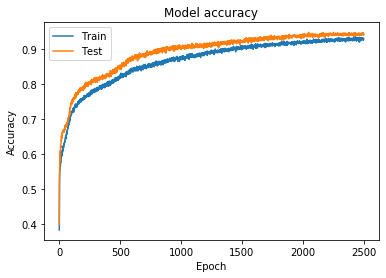

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
plt.savefig('./charts/cnn_accuracy.png', dpi=300, bbox_inches='tight')

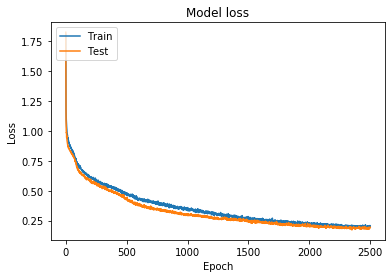

In [65]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
plt.savefig('./charts/cnn_lossvalues.png', dpi=300, bbox_inches='tight')